In [2]:
import pandas as pd


data = pd.read_csv('FoodTypeDataset.csv')

names = ['label'+str(i) for i in range(0, len(data.columns)-1)]
names.append('target')

print(names)

data.columns = names

print(data.head())

['label0', 'label1', 'label2', 'label3', 'label4', 'label5', 'label6', 'label7', 'label8', 'label9', 'label10', 'label11', 'label12', 'label13', 'label14', 'label15', 'label16', 'label17', 'label18', 'label19', 'label20', 'label21', 'label22', 'label23', 'label24', 'label25', 'label26', 'label27', 'label28', 'label29', 'label30', 'label31', 'label32', 'label33', 'label34', 'label35', 'label36', 'label37', 'label38', 'label39', 'label40', 'label41', 'label42', 'label43', 'label44', 'label45', 'label46', 'label47', 'label48', 'label49', 'label50', 'label51', 'label52', 'label53', 'label54', 'label55', 'label56', 'label57', 'label58', 'label59', 'label60', 'label61', 'label62', 'label63', 'label64', 'target']
     label0    label1    label2    label3    label4    label5    label6  \
0  0.138983  0.240758  0.076423  0.034312  0.071863 -0.211420 -0.125416   
1 -0.450061  0.262221 -0.522730 -0.543112  0.587173 -0.169132  0.327129   
2  0.424333  0.558596  0.575716  0.405802  0.003155 -0.3916

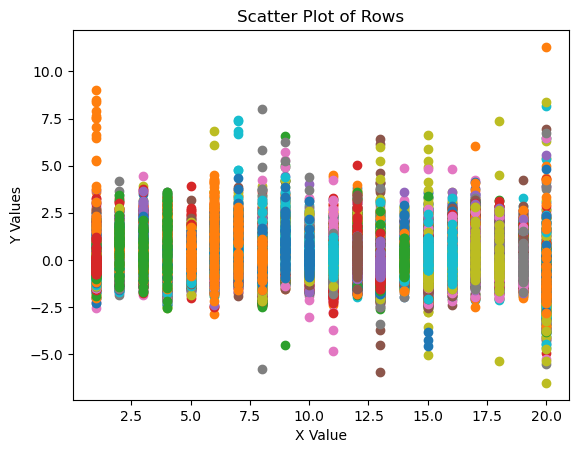

In [19]:
import matplotlib.pyplot as plt

for i in range(len(data)):
    x_value = data.iloc[i, -1]  # Last column as X
    y_values = data.iloc[i, :-1]  # All columns except the last one as Y
    plt.scatter([x_value] * len(y_values), y_values)

# Add labels
plt.xlabel('X Value')
plt.ylabel('Y Values')
plt.title('Scatter Plot of Rows')

# Show the plot
plt.show()

## Plot of first row

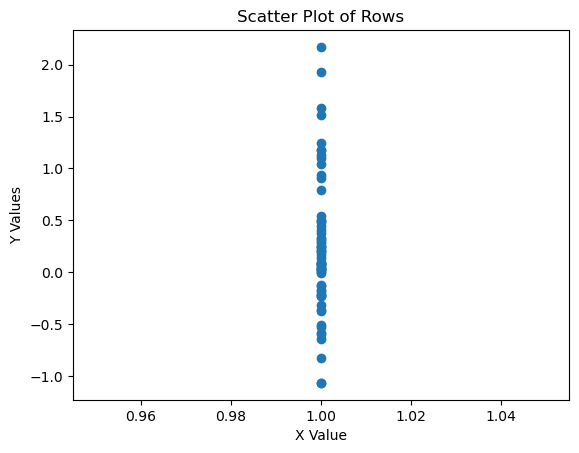

In [17]:
x_value = data.iloc[0, -1]  # Last column as X
y_values = data.iloc[0, :-1]  # All columns except the last one as Y
plt.scatter(, y_values)

# Add labels
plt.xlabel('X Value')
plt.ylabel('Y Values')
plt.title('Scatter Plot of Rows')

# Show the plot
plt.show()

## Split the data and standardize it 

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Define independent (features) and dependent (targets) variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


 
# split training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

print(X_train)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)

[[ 1.14382315  0.17787327  1.27472752 ...  0.21315978  0.36056509
   0.26316631]
 [-0.51586493  0.65549154 -0.34565401 ... -0.31637437  0.04637708
  -0.12941444]
 [-0.73341188 -0.20763945 -0.73991528 ... -0.26977224 -0.91066196
  -0.86776355]
 ...
 [-0.33745543  0.28749541 -0.28967049 ... -0.46041013 -0.42416195
  -0.31953527]
 [ 0.06030484 -0.61310948 -0.10137629 ...  0.84315731  0.69972794
  -0.2959243 ]
 [-1.37337187 -0.15552424 -1.3216     ... -1.48264678 -1.15892407
  -1.75208483]]
[[ 1.1428105   0.15681299  1.26967431 ...  0.21248596  0.35185988
   0.24710824]
 [-0.51769326  0.64466429 -0.35221575 ... -0.32301932  0.03898125
  -0.14213499]
 [-0.73534712 -0.2369594  -0.74684407 ... -0.2758917  -0.91406932
  -0.87420702]
 ...
 [-0.33919607  0.2687838  -0.29618012 ... -0.46867926 -0.42959681
  -0.3306395 ]
 [ 0.05875968 -0.65111668 -0.10771062 ...  0.84958745  0.68960927
  -0.30722927]
 [-1.37562163 -0.18372761 -1.32907032 ... -1.50244285 -1.1612968
  -1.75101025]]


## KNN Classification

In [71]:
# KNN classification

classifier = KNeighborsClassifier(n_neighbors=8, weights='distance', algorithm='kd_tree', leaf_size=5, p=55, )
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

# print(confusion_matrix(y_test, y_predict))
# print(classification_report(y_test, y_predict))
classifier.score(X_test, y_test)

0.45989304812834225

## Multi-Layer Perceptron Classifier

In [34]:
from sklearn.neural_network import MLPClassifier
# Create an MLPClassifier instance with default parameters
mlp = MLPClassifier(random_state=42)

# Train the model on the scaled training data
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)


# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

mlp.score(X_test, y_test)

Confusion Matrix:
[[ 5  1  1  0  0  0  1  0  0  0  1  0  0  0  0  0  1  1  0  1]
 [ 1  2  1  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  4  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0 10  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  4  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  1  0  0  0  5  0  2  0  0  2  0  1  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  6  0  0  0  0  0  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  4  0  0  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  1  2  1  1  0  3  1  1  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  2  0  0  2  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  1  0  1  4  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  3  0  0  1  0  1  1  5  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0

0.5668449197860963

## Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=500, max_depth=200, bootstrap=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

clf.score(X_test, y_test)

0.5828877005347594

In [24]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [25]:
k = 5  # number of fold
kf = KFold(n_splits=k, random_state=None)
knn = KNeighborsClassifier(n_neighbors=5)
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
     
    knn.fit(X_train, y_train)
    pred_values = knn.predict(X_test.values)
     
    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.18181818181818182, 0.1925133689839572, 0.26881720430107525, 0.27419354838709675, 0.15053763440860216]
Avg accuracy : 0.21357598757978263
